In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

In [2]:
all_results = pd.read_csv('results/experiment_results.csv')

In [3]:
measurements = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'average_precision',
               'collecting_datasets', 'training', 'training_per_epoch', 'prediction']
    
measurements_aggregation = { m: ['mean', 'std'] for m in measurements }

measurement_names = { m: m.capitalize().replace('_', ' ') for m in measurements }
for m in ['collecting_datasets', 'training', 'training_per_epoch', 'prediction']:
    measurement_names[m] += ' time [s]'

In [4]:
train_size_results = all_results[all_results['experiment_type'] == 'train size']
grouped_train_size = train_size_results.groupby('train_size').agg(measurements_aggregation)
grouped_train_size

accuracy           precision              recall            \
                mean       std      mean       std      mean       std   
train_size                                                               
50.0        0.871286  0.023281  0.172517  0.158323  0.153562  0.149283   
100.0       0.895783  0.001874  0.165730  0.254953  0.028112  0.061376   
500.0       0.894772  0.003535  0.506396  0.088421  0.073821  0.045158   
1000.0      0.895979  0.002078  0.578088  0.070067  0.081821  0.075944   
5000.0      0.902405  0.002120  0.597751  0.039922  0.220697  0.020021   
10000.0     0.903275  0.001992  0.628456  0.040408  0.194219  0.013686   

            f1_score             roc_auc           average_precision  \
                mean       std      mean       std              mean   
train_size                                                             
50.0        0.160360  0.150207  0.636455  0.050531          0.214004   
100.0       0.045599  0.099031  0.692697  0.048257          0.254059   
500.0       0.124119  0.066880  0.704440  0.035047          0.260126   
1000.0      0.129694  0.114646  0.753855  0.012370          0.333922   
5000.0      0.321280  0.016919  0.821088  0.010922          0.422567   
10000.0     0.296169  0.014874  0.832807  0.005578          0.437308   

                     collecting_datasets              training             \
                 std                mean       std        mean        std   
train_size                                                                  
50.0        0.042165            0.008368  0.000099    9.443078  10.068986   
100.0       0.055210            0.008320  0.000122    5.549138   1.787458   
500.0       0.037059            0.008241  0.000061   16.153625   3.187924   
1000.0      0.018334            0.008434  0.000242   43.988002  20.233890   
5000.0      0.009970            0.008298  0.000062  274.131447  51.456880   
10000.0     0.014329            0.008555  0.000277  588.138484  88.225909   

           training_per_epoch           prediction            
                         mean       std       mean       std  
train_size                                                    
50.0                 0.163487  0.007958   6.841538  0.028617  
100.0                0.180284  0.001332   6.863178  0.033307  
500.0                0.438811  0.004274   6.708847  0.080304  
1000.0               0.743658  0.002666   6.800266  0.045685  
5000.0               3.540162  0.011825   6.817570  0.128595  
10000.0              7.018888  0.018665   7.056671  0.192704

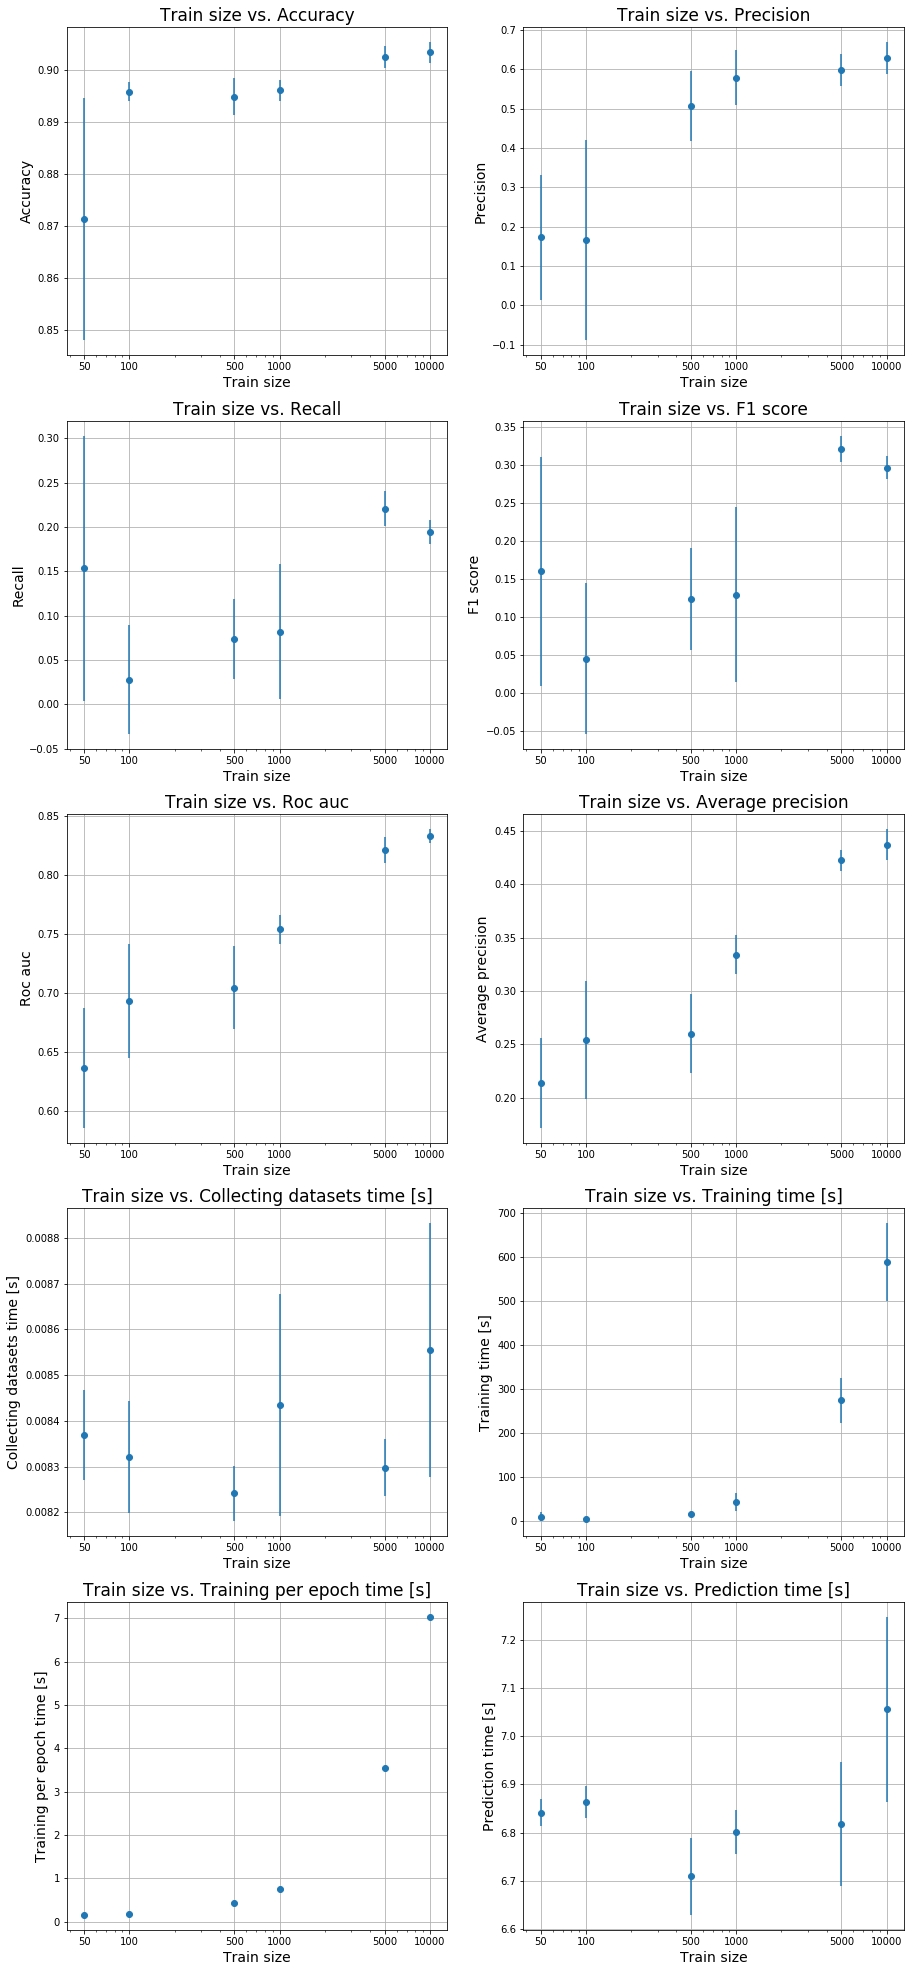

In [5]:
fig, axes = plt.subplots(nrows=len(measurements)// 2, ncols=2, figsize=(15, 3.5 * len(measurements)))
for i, m in enumerate(measurements):
    ax = axes[i // 2][i % 2]
    ax.errorbar(
        grouped_train_size.index,
        grouped_train_size[m]['mean'], grouped_train_size[m]['std'],
        linestyle='None', marker='o'
    )
    ax.set_xscale('log')
    ax.set_xticks(grouped_train_size.index)
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.set_xlabel('Train size', size=14)
    ax.set_ylabel(measurement_names[m], size=14)
    ax.set_title(f'Train size vs. {measurement_names[m]}', size=17)
    ax.grid(True)
plt.show()

In [6]:
workers_results = all_results[all_results['experiment_type'] == 'num of workers']
grouped_workers = workers_results.groupby('num_of_workers').agg(measurements_aggregation)
grouped_workers

accuracy           precision              recall            \
                    mean       std      mean       std      mean       std   
num_of_workers                                                               
1               0.906446  0.001889  0.647370  0.031961  0.240236  0.018067   
2               0.905688  0.001890  0.634346  0.035334  0.242907  0.023048   
4               0.905492  0.001457  0.633800  0.034573  0.240228  0.028817   
8               0.905548  0.001311  0.630685  0.021746  0.241572  0.012254   
16              0.906193  0.001360  0.660289  0.036173  0.222840  0.028878   
32              0.905379  0.001838  0.637231  0.038461  0.233007  0.022153   
64              0.905688  0.001198  0.644877  0.016236  0.224986  0.017640   
128             0.903948  0.001064  0.637023  0.036902  0.202770  0.033351   

                f1_score             roc_auc           average_precision  \
                    mean       std      mean       std              mean   
num_of_workers                                                             
1               0.349784  0.017164  0.852484  0.004878          0.469128   
2               0.350238  0.020039  0.853090  0.005667          0.470601   
4               0.346896  0.025267  0.853225  0.004927          0.468754   
8               0.349045  0.011783  0.852953  0.005222          0.470044   
16              0.331630  0.026894  0.852065  0.006033          0.468741   
32              0.340073  0.019236  0.851844  0.007152          0.466997   
64              0.333222  0.019245  0.845967  0.008716          0.459220   
128             0.305547  0.032869  0.847218  0.007275          0.454057   

                         collecting_datasets               training  \
                     std                mean       std         mean   
num_of_workers                                                        
1               0.009324            0.003280  0.000154  1423.962022   
2               0.012030            0.006051  0.000302  1456.008804   
4               0.010782            0.011126  0.000286  1431.775481   
8               0.009745            0.022801  0.000608  1383.396039   
16              0.010376            0.046423  0.001825  1184.169107   
32              0.012225            0.101691  0.000474  1063.760777   
64              0.013869            0.245394  0.002262  1117.065253   
128             0.015131            0.639437  0.005180  1020.978566   

                           training_per_epoch           prediction            
                       std               mean       std       mean       std  
num_of_workers                                                                
1               158.023648          19.992243  0.085316   7.381367  0.436188  
2               214.721726          20.267370  0.099509   7.618592  0.154550  
4               144.447996          20.389924  0.102932   7.322843  0.517240  
8               113.655671          20.470017  0.092388   7.242310  0.554256  
16              113.568254          20.917346  0.085293   7.094450  0.328773  
32              197.238724          21.615168  0.069703   7.668904  0.453551  
64              257.427357          24.486401  0.064618   8.900032  0.294952  
128             218.843973          26.868359  0.036246   9.635018  0.330469

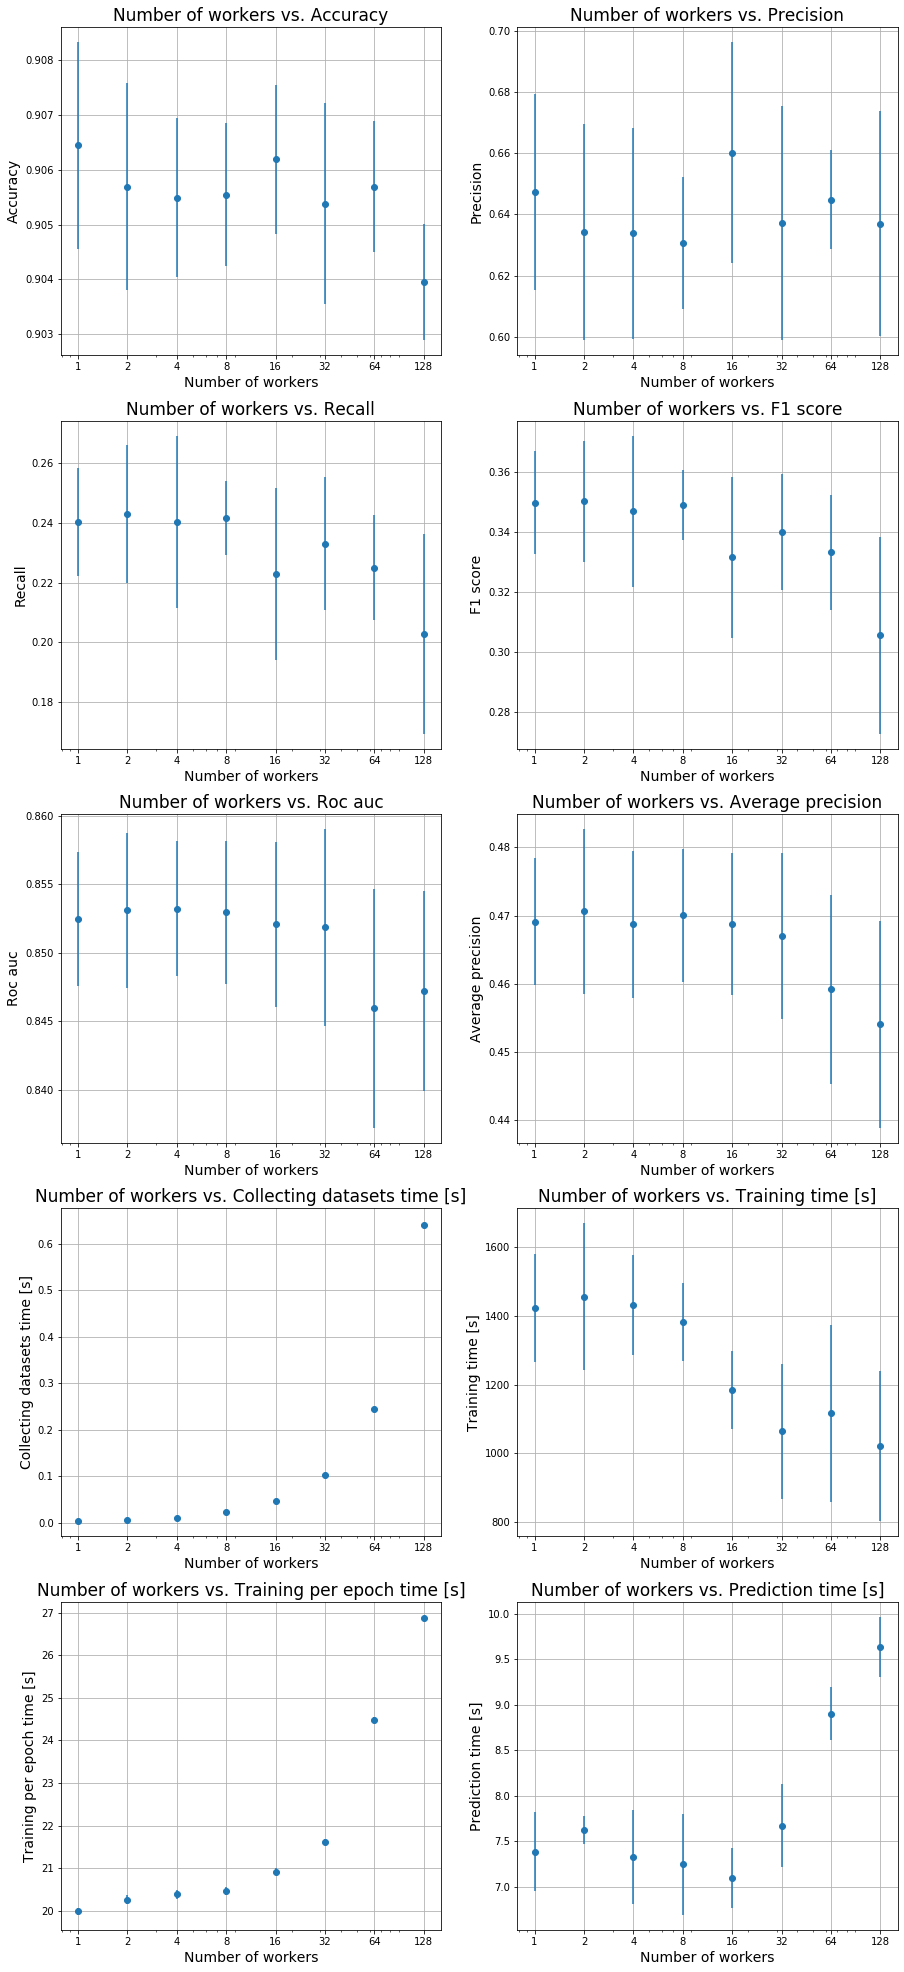

In [9]:
fig, axes = plt.subplots(nrows=len(measurements)// 2, ncols=2, figsize=(15, 3.5 * len(measurements)))
for i, m in enumerate(measurements):
    ax = axes[i // 2][i % 2]
    ax.errorbar(
        grouped_workers.index,
        grouped_workers[m]['mean'], grouped_workers[m]['std'],
        linestyle='None', marker='o'
    )
    ax.set_xscale('log')
    ax.set_xticks(grouped_workers.index)
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.set_xlabel('Number of workers', size=14)
    ax.set_ylabel(measurement_names[m], size=14)
    ax.set_title(f'Number of workers vs. {measurement_names[m]}', size=17)
    ax.grid(True)
plt.show()